In [129]:
import pandas as pd
from matplotlib import pyplot
%matplotlib inline


In [130]:
enrollees = pd.read_csv('mm_2014.csv', sep='\t')
enrollees['gender'] = pd.Series(1, index=enrollees.index)
enrollees.loc[enrollees.name.str.contains('ВНА'), ['gender']] = 0


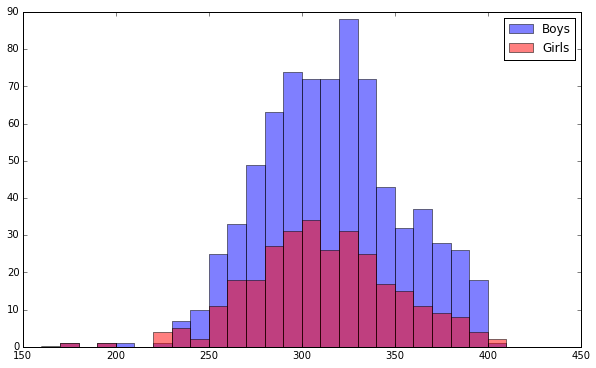

In [138]:
boys = enrollees[enrollees.gender == 1]['points']
girls = enrollees[enrollees.gender == 0]['points']

pyplot.figure(figsize=(10,6))
pyplot.hist(boys.as_matrix(), bins=np.arange(160, 420, 10), alpha=0.5, label='Boys')
pyplot.hist(girls, bins=np.arange(160, 420, 10), alpha=0.5, label='Girls', color='red')
pyplot.legend(loc='upper right')
pyplot.show()


In [132]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h


In [133]:
print('Boys', enrollees[enrollees.gender == 1].name.count())
print('Girls', enrollees[enrollees.gender == 0].name.count())


Boys 754
Girls 300


In [134]:
print('Boys acceptance rate', mean_confidence_interval(enrollees[enrollees.gender == 1].success))
print('Girls acceptance rate', mean_confidence_interval(enrollees[enrollees.gender == 0].success))


Boys acceptance rate (0.57161803713527848, 0.53621685405582697, 0.60701922021472998)
Girls acceptance rate (0.50666666666666671, 0.44976756940466667, 0.56356576392866675)


In [135]:
print('Boys points', enrollees[enrollees.gender == 1].points.median(), mean_confidence_interval(enrollees[enrollees.gender == 1].points))
print('Girls points', enrollees[enrollees.gender == 0].points.median(), mean_confidence_interval(enrollees[enrollees.gender == 0].points))


Boys points 315.0 (315.60477453580904, 312.92500020697844, 318.28454886463965)
Girls points 308.5 (310.38999999999999, 306.00753087168346, 314.77246912831652)
